In [3]:
import pandas as pd
from sklearn.preprocessing import QuantileTransformer, MinMaxScaler

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
corr_data = train_data.copy()

train_data.replace({
    "X3": {'Low Fat': 0, 'Regular': 1, 'low fat': 0, 'LF': 0, 'reg': 1},
    "X9": {'Medium': 1, 'High': 2, 'Small': 0}
}, inplace=True)

test_data.replace({
    "X3": {'Low Fat': 0, 'Regular': 1, 'low fat': 0, 'LF': 0, 'reg': 1},
    "X9": {'Medium': 1, 'High': 2, 'Small': 0}
}, inplace=True)

for column in train_data.columns:
    train_data[column].fillna(train_data[column].mode()[0], inplace=True)

for column in test_data.columns:
    test_data[column].fillna(test_data[column].mode()[0], inplace=True)

train_data = pd.get_dummies(train_data, columns=['X11', 'X7'], prefix=['X11', 'X7'])
test_data = pd.get_dummies(test_data, columns=['X11', 'X7'], prefix=['X11', 'X7'])

train_data = train_data[['X2', 'X3', 'X4', 'X6', 'X7_OUT010', 'X7_OUT019', 'X7_OUT027', 
                         'X8', 'X9', 'X11_Grocery Store', 'X11_Supermarket Type1', 
                         'X11_Supermarket Type3','Y']]
test_data = test_data[['X2', 'X3', 'X4', 'X6', 'X7_OUT010', 'X7_OUT019', 'X7_OUT027', 
                       'X8', 'X9', 'X11_Grocery Store', 'X11_Supermarket Type1', 
                       'X11_Supermarket Type3']]


C:\Users\mobed\AppData\Local\Temp\ipykernel_3912\4007613434.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data.replace({
C:\Users\mobed\AppData\Local\Temp\ipykernel_3912\4007613434.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data.replace({
C:\Users\mobed\AppData\Local\Temp\ipykernel_3912\4007613434.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never wo

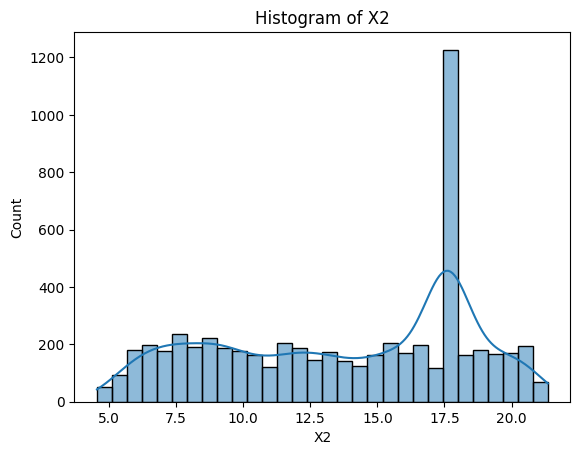

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(x =train_data["X2"], kde=True, bins=30)
plt.title('Histogram of X2')
plt.show()




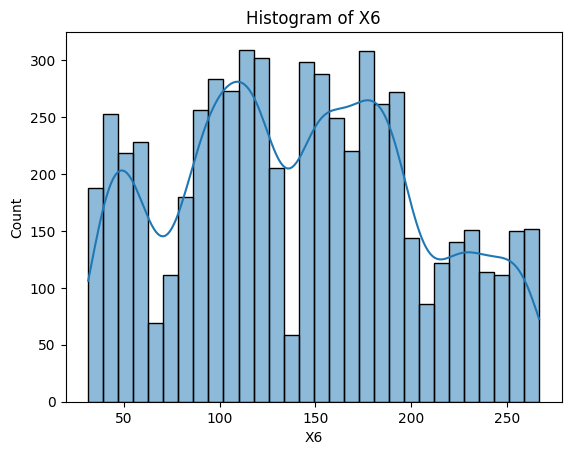

In [5]:


sns.histplot(x=train_data["X6"], kde=True, bins=30)
plt.title('Histogram of X6')
plt.show()

In [6]:

quantile_transformer = QuantileTransformer(output_distribution='normal')
train_data[["X2", "X6"]] = quantile_transformer.fit_transform(train_data[["X2", "X6"]])
test_data[["X2", "X6"]] = quantile_transformer.transform(test_data[["X2", "X6"]])


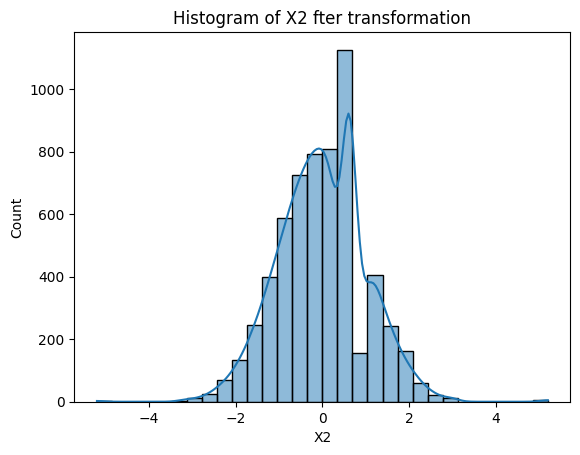

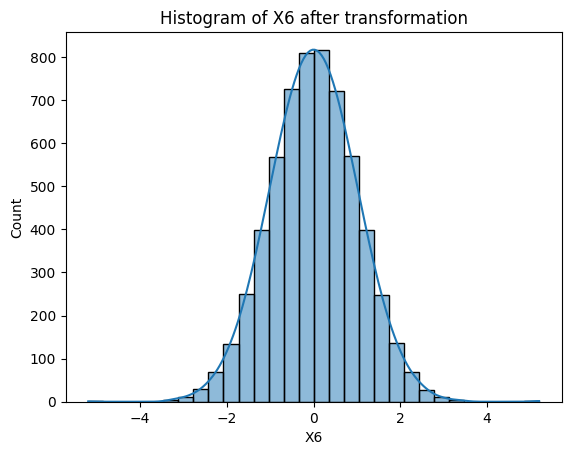

In [7]:
sns.histplot(x =train_data["X2"], kde=True, bins=30)
plt.title('Histogram of X2 fter transformation')
plt.show()


sns.histplot(x=train_data["X6"], kde=True, bins=30)
plt.title('Histogram of X6 after transformation')
plt.show()

In [8]:

scaler = MinMaxScaler()
train_data[["X2", "X6", "X8"]] = scaler.fit_transform(train_data[["X2", "X6", "X8"]])
test_data[["X2", "X6", "X8"]] = scaler.transform(test_data[["X2", "X6", "X8"]])


In [9]:


train_data.to_csv("train_preprocessed.csv", index=False)
test_data.to_csv("test_preprocessed.csv", index=False)



In [10]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Step 1: Load the preprocessed train and test data
train_data = pd.read_csv("train_preprocessed.csv")
test_data = pd.read_csv("test_preprocessed.csv")

# Step 2: Prepare the data for Linear Regression
X_train = train_data.drop('Y', axis=1)  # Features for training
y_train = train_data['Y']  # Target variable for training

X_test = test_data  # Features for testing (target 'Y' is not available)

# Step 3: Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)  # Train the model on the training data

# Step 4: Make predictions on the test data
y_pred = model.predict(X_test)  # Predict the target values for the test data

# Step 5: Save the predictions to a new CSV file (since we don't have ground truth for test data)
test_data['Y_pred'] = y_pred  # Add the predicted values as a new column in the test data

# Save the test data with predictions to a new CSV file
test_data.to_csv("test_predictions.csv", index=False)




In [11]:
model.score(X_train, y_train)

0.7176342078083013

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred, alpha=0.6, color="blue")  
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2) 
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values (y_train)")
plt.ylabel("Predicted Values (y_pred)")
plt.grid(True)
plt.show()


In [8]:
print("X3 is Binary")
print(original_data['X3'].unique())
print("="*10)
print("X9 is ordinal")
print(original_data['X9'].unique())
print("="*10)
print("X5 is nominal ")
print(original_data['X5'].unique())
print("="*10)
print("X7 is nominal ")
print(original_data['X7'].unique())
print("="*10)
print("X10 is nominal ")
print(original_data['X10'].unique())
print("="*10)
print("X11 is nominal ")
print(original_data['X11'].unique())

X3 is Binary


NameError: name 'original_data' is not defined

# You can try:

## Feature Relations

## Standardization

## iterative imputer

## knn imputer

## label encoder
